In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
pd.options.display.max_columns = None

from sklearn import model_selection, preprocessing
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor,  DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report, r2_score, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
df= pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [20]:
df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [21]:
df.shape

(119390, 32)

In [22]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [23]:
df.is_canceled.value_counts()

#Bastante balanceado

0    75166
1    44224
Name: is_canceled, dtype: int64

#### Descripción de las columnas


Hotel (H1 = Resort Hotel o H2 = City Hotel)

is_canceled: Valor que indica si la reserva fue cancelada (1) o no (0)

lead_time: Número de días transcurridos entre la fecha de entrada de la reserva en el Sistema de gestión hotelero y la fecha de llegada

arrival_date_year: Año de la fecha de llegada

arrival_data_month: mes de la fecha de llegada

arrival_date_week_number:  semana de la fecha de llegada

arrival_date_day_of_month: día de la fecha de llegada

stays_in_weekend_nights: Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel

stays_in_week_nights: Número de noches entre semana (de lunes a viernes) que el huésped se alojó o reservó en el hotel

adults: Número de adultos

children: Número de niños

babies: Número de bebés

meal: Tipo de comida reservada. Las categorías se desglosan en paquetes hoteleros ldad estándar: No definido/SC: sin régimen de comidas; BB: alojamiento y desayuno; HB: media pensión (desayuno y otra comida, normalmente cena); FB: pensión completa (desayuno, almuerzo y cena).

country: País de origen. Formato ISO 3155-3:2013

market_segment: Designación del segmento de mercado. El término "TA" significa "agencias de viajes" y "TO" significa "turoperadores"

distribution_channel: Canal de distribución de las reservas. En las categorías, el término "TA" significa "Agencias de viajes" y "TO" significa "Turoperadores"

is_repeated_guest: indica si el nombre de la reserva era de un huésped repetido (1) o no (0)

previous_cancellations: Número de reservas anteriores canceladas por el cliente antes de la reserva actual

previous_bookings_not_canceled:Número de reservas anteriores no canceladas por el cliente antes de la reserva actual

reserved_room_type: Código del tipo de habitación reservada. Por razones de anonimato, se indica el código en lugar de la identificación.

assigned_room_type: Código del tipo de habitación que se asigna a la reserva. Estas dos variables difieren en ocasiones por motivos de gestión del hotel (por ejemplo, exceso de reservas) o a petición del cliente. 

booking_changes: Número de cambios efectuados en la reserva desde el momento en que ésta se introdujo en el PMS hasta el momento de la emisión de la factura o la cancelación.

deposit_type: Indicación de si el cliente hizo un depósito para garantizar la reserva. Esta variable puede asumir tres categorías 1)Sin depósito: no se cargó ningún depósito; No reembolsable: se efectuó un depósito por valor del coste total de la estancia; Reembolsable: se efectuó un depósito por valor inferior al coste total de la estancia.

agent: ID de la agencia de viajes que efectuó la reserva

company: ID de la empresa/entidad que realizó la reserva o responsable del pago de la reserva. Se presenta el ID en lugar de la identificación por razones de anonimato

days_in_waiting_list: días que la reserva estuvo en lista de espera antes de ser confirmada al cliente

customer_type: Tipo de reserva, considerando una de las cuatro categorías siguientes: Contrato - cuando la reserva tiene asociada una adjudicación u otro tipo de contrato, las reservas "allotment" son de carácter especial y global que se realiza con las agencias de viajes y las líneas aéreas que se han significado como buenos proveedores del hotel; Grupal - cuando la reserva está asociada a un grupo; Transitoria/individual - cuando la reserva no forma parte de un grupo o contrato, y no está asociada a otra reserva transitoria; Transitoria-parte - cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria.

adr: Tarifa media diaria definida dividiendo la suma de todas las transacciones de alojamiento por el número total de noches de estancia.

required_car_parking_spaces: Número de plazas de aparcamiento requeridas por el cliente

total_of_special_requests: Número de solicitudes especiales realizadas por el cliente

reservation_status: Estado de la reserva, considerando tres categorías: Cancelada: el cliente ha cancelado la reserva; Check-Out: el cliente se ha registrado pero ya se ha marchado; No-Show: el cliente no se ha registrado y ha informado al hotel del motivo.

reservation_status_date: Fecha en la que se estableció el último estado. 

In [24]:
lista= []

for columna in df: 
    lista1= [columna, df[columna].dtypes, df[columna].isnull().sum(),df[columna].nunique()]
    lista.append(lista1)
lista
informacion= pd.DataFrame(lista)
informacion.to_excel("info_variables.xlsx")
informacion
informacion= informacion.rename(columns= {0:'Variable', 1:'Tipo', 2:'Valores nulos', 3:'Valores únicos'})
informacion

,Variable,Tipo,Valores nulos,Valores únicos
0,hotel,object,0,2
1,is_canceled,int64,0,2
2,lead_time,int64,0,479
3,arrival_date_year,int64,0,3
4,arrival_date_month,object,0,12
5,arrival_date_week_number,int64,0,53
6,arrival_date_day_of_month,int64,0,31
7,stays_in_weekend_nights,int64,0,17
8,stays_in_week_nights,int64,0,35
9,adults,int64,0,14


#### Determinar valores nulos de las columnas

In [25]:
df.isnull().sum().sort_values(ascending = False)


company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [26]:
round((df.isnull().sum().sort_values(ascending = False) * 100) / len(df), 2)

company                           94.31
agent                             13.69
country                            0.41
children                           0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
hotel                              0.00
previous_cancellations             0.00
days_in_waiting_list               0.00
customer_type                      0.00
adr                                0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
adults                             0.00
stays_in_week_nights               0.00


In [27]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Sustitución de valores nulos en los campos 'country' y 'children'

In [28]:
df['children']= df['children'].fillna(0)

df['country']= df['country'].fillna('PRT')

Eliminación de las variables “agent” y “company”, 'reservation_status'. 

In [29]:
df= df.drop(['agent', 'company', 'reservation_status'], axis= 1)

Registramos las variables con formato fecha

In [30]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

df['year']=df['reservation_status_date'].dt.year
df['month']=df['reservation_status_date'].dt.month
df['day']=df['reservation_status_date'].dt.day


Convertir las variables categóricas y fechas a variables númericas

In [31]:
le=preprocessing.LabelEncoder()

In [32]:
a= df.select_dtypes(object).columns

for i in a:
    df[i]= le.fit_transform(df[i])
    le_name_mapping= dict(zip(le.classes_, le.transform(le.classes_)))
    print(i)
    print(le_name_mapping)
print('Year')
df['year']= le.fit_transform(df['year'])
le_name_mapping= dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
print('month')
df['month']= le.fit_transform(df['month'])
print(le_name_mapping)
print('day')
df['day']= le.fit_transform(df['day'])
le_name_mapping= dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

hotel
{'City Hotel': 0, 'Resort Hotel': 1}
arrival_date_month
{'April': 0, 'August': 1, 'December': 2, 'February': 3, 'January': 4, 'July': 5, 'June': 6, 'March': 7, 'May': 8, 'November': 9, 'October': 10, 'September': 11}
meal
{'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
country
{'ABW': 0, 'AGO': 1, 'AIA': 2, 'ALB': 3, 'AND': 4, 'ARE': 5, 'ARG': 6, 'ARM': 7, 'ASM': 8, 'ATA': 9, 'ATF': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BOL': 24, 'BRA': 25, 'BRB': 26, 'BWA': 27, 'CAF': 28, 'CHE': 29, 'CHL': 30, 'CHN': 31, 'CIV': 32, 'CMR': 33, 'CN': 34, 'COL': 35, 'COM': 36, 'CPV': 37, 'CRI': 38, 'CUB': 39, 'CYM': 40, 'CYP': 41, 'CZE': 42, 'DEU': 43, 'DJI': 44, 'DMA': 45, 'DNK': 46, 'DOM': 47, 'DZA': 48, 'ECU': 49, 'EGY': 50, 'ESP': 51, 'EST': 52, 'ETH': 53, 'FIN': 54, 'FJI': 55, 'FRA': 56, 'FRO': 57, 'GAB': 58, 'GBR': 59, 'GEO': 60, 'GGY': 61, 'GHA': 62, 'GIB': 63, 'GLP': 64, 'GNB':

In [33]:
df.isnull().sum()/len(df)*100


hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [34]:
confirmed_bookings= df[df['is_canceled'] == '0']

In [35]:
canceled_bookings = df[df['is_canceled'] == '1']

% de cancelaciones de todas las reservas

In [36]:
44224/len(df)*100

37.041628277075134

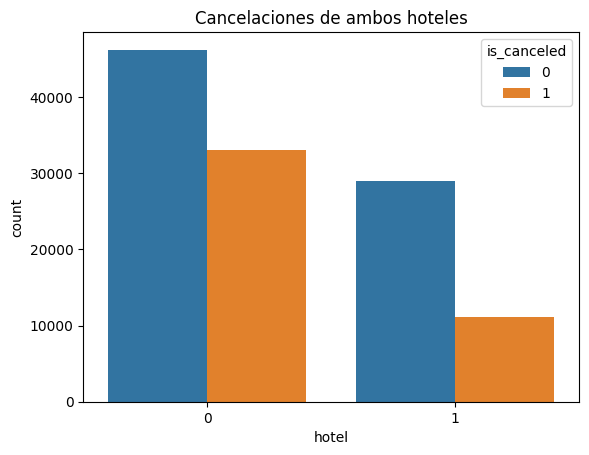

In [37]:
sns.countplot(x="hotel",data=df,hue="is_canceled")
plt.title('Cancelaciones de ambos hoteles')
plt.show()

El hotel situado en la ciudad se ve afectada por un mayor número de cancelaciones, pero a la vez recibe un mayor número de reservas efectuadas con respecto al complejo hotelero.

Veamos si es una tendencia sostenida a lo largo del tiempo:


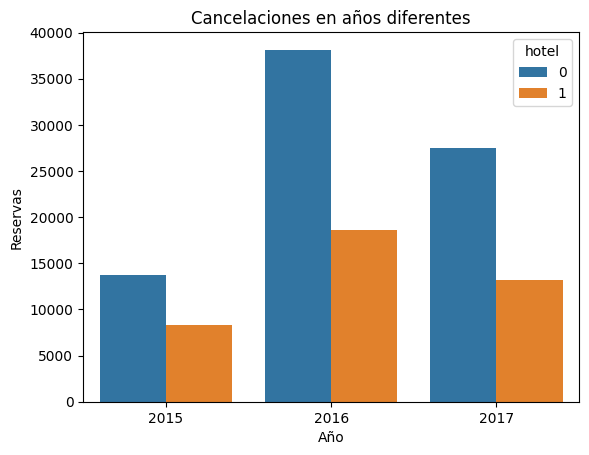

In [38]:
plt.title('Cancelaciones en años diferentes')

sns.countplot(x = 'arrival_date_year', data = df, hue = 'hotel').set(xlabel= 'Año', ylabel= 'Reservas');


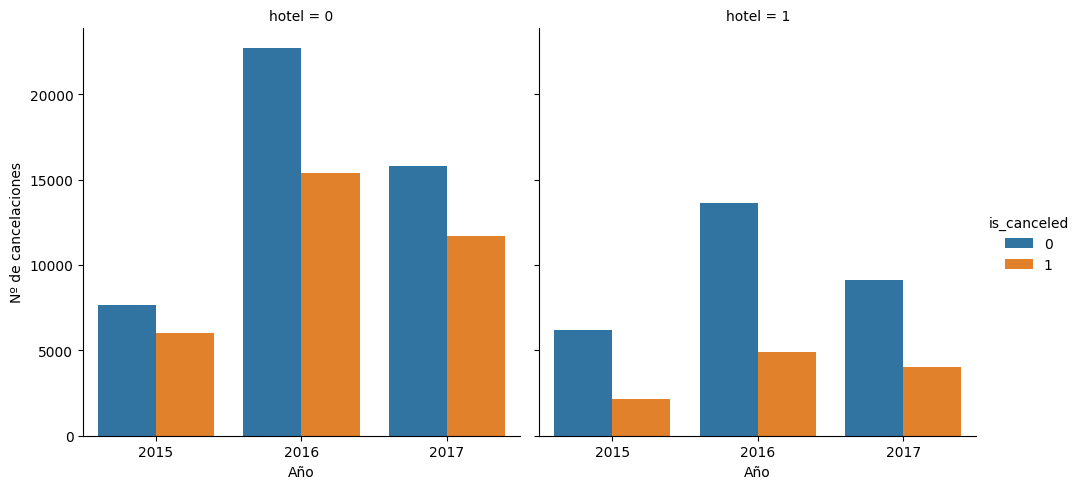

In [39]:
sns.catplot(x='arrival_date_year', hue= 'is_canceled', col='hotel', data=df, kind='count').set(xlabel= 'Año', ylabel="Nº de cancelaciones");


Podemos ver que 2016 fue el año con mayor número de reservas:

In [40]:
year=df.groupby(["arrival_date_year"])[["arrival_date_year"]].count()


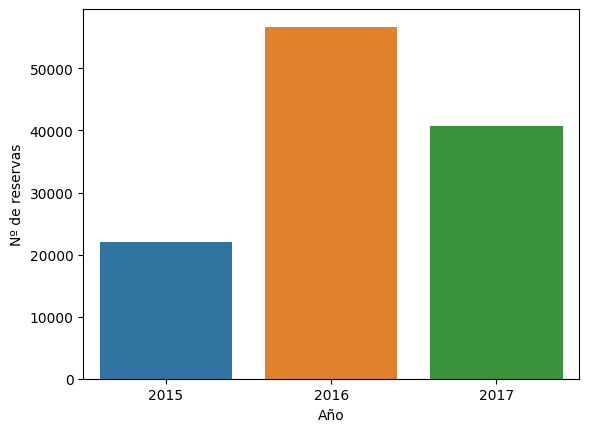

In [41]:
sns.barplot(x=year.index,y=year["arrival_date_year"]).set(xlabel= 'Año', ylabel= 'Nº de reservas');


Número de reservas por mes 

Text(0.5, 1.0, 'Reservas por meses')

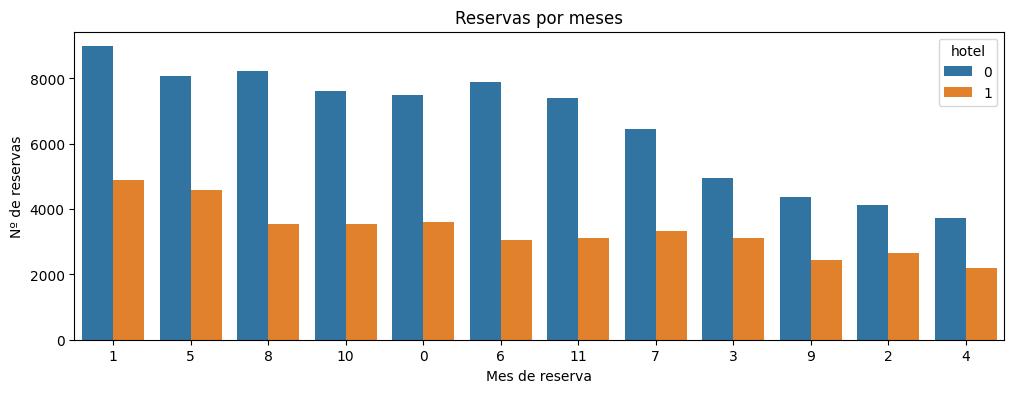

In [65]:
plt.figure(figsize = (12,4))

sns.countplot(x='arrival_date_month',data=df,order=df.arrival_date_month.value_counts().index,hue='hotel').set(xlabel= 'Mes de reserva', ylabel= "Nº de reservas")
plt.title('Reservas por meses')


Los meses estivales, Julio y Agosto, son los que más número de reservas tienen, algo esperable debido a la época de vacaciones.

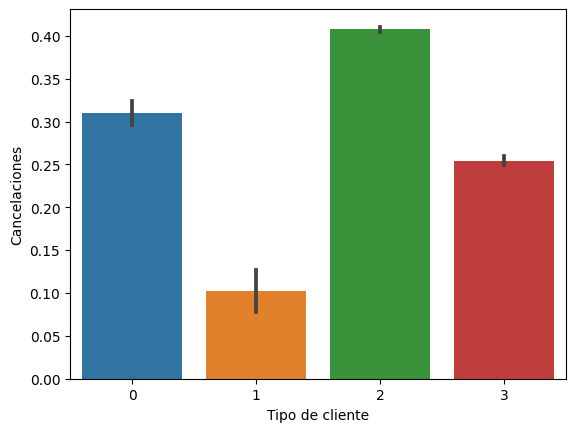

In [43]:
sns.barplot(x = df["customer_type"], y = df["is_canceled"]).set(xlabel= "Tipo de cliente", ylabel= 'Cancelaciones');

Vemos que el tipo de cliente segun su reserva afecta, por lo que habrá que tenerlo en cuenta.

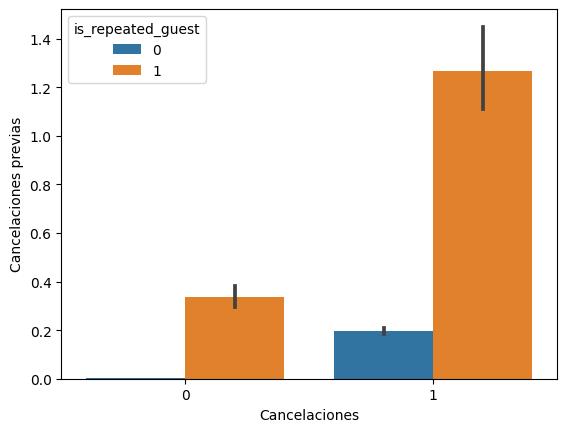

In [44]:
sns.barplot(x = df["is_canceled"], y = df["previous_cancellations"], hue = df["is_repeated_guest"]).set(xlabel= "Cancelaciones", ylabel= "Cancelaciones previas");


Los clientes que repiten tienden a cancelar más.

Text(0.5, 1.0, 'Depósito pagado por el cliente')

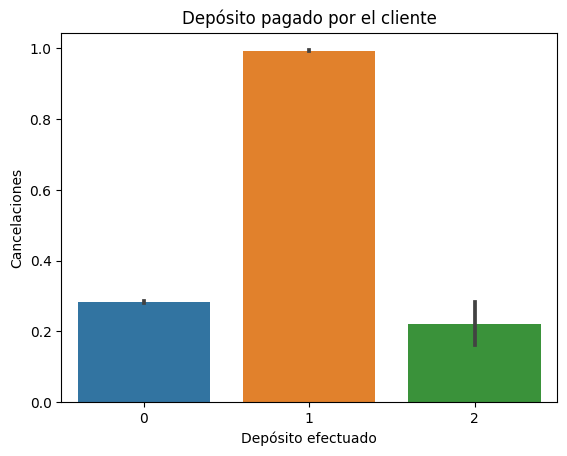

In [67]:
sns.barplot(y = df["is_canceled"], x = df["deposit_type"]).set(xlabel= "Depósito efectuado", ylabel= "Cancelaciones")
plt.title("Depósito pagado por el cliente")

Curiosamente, aquellas reservas que no son reembolsables dominan el número de cancelaciones

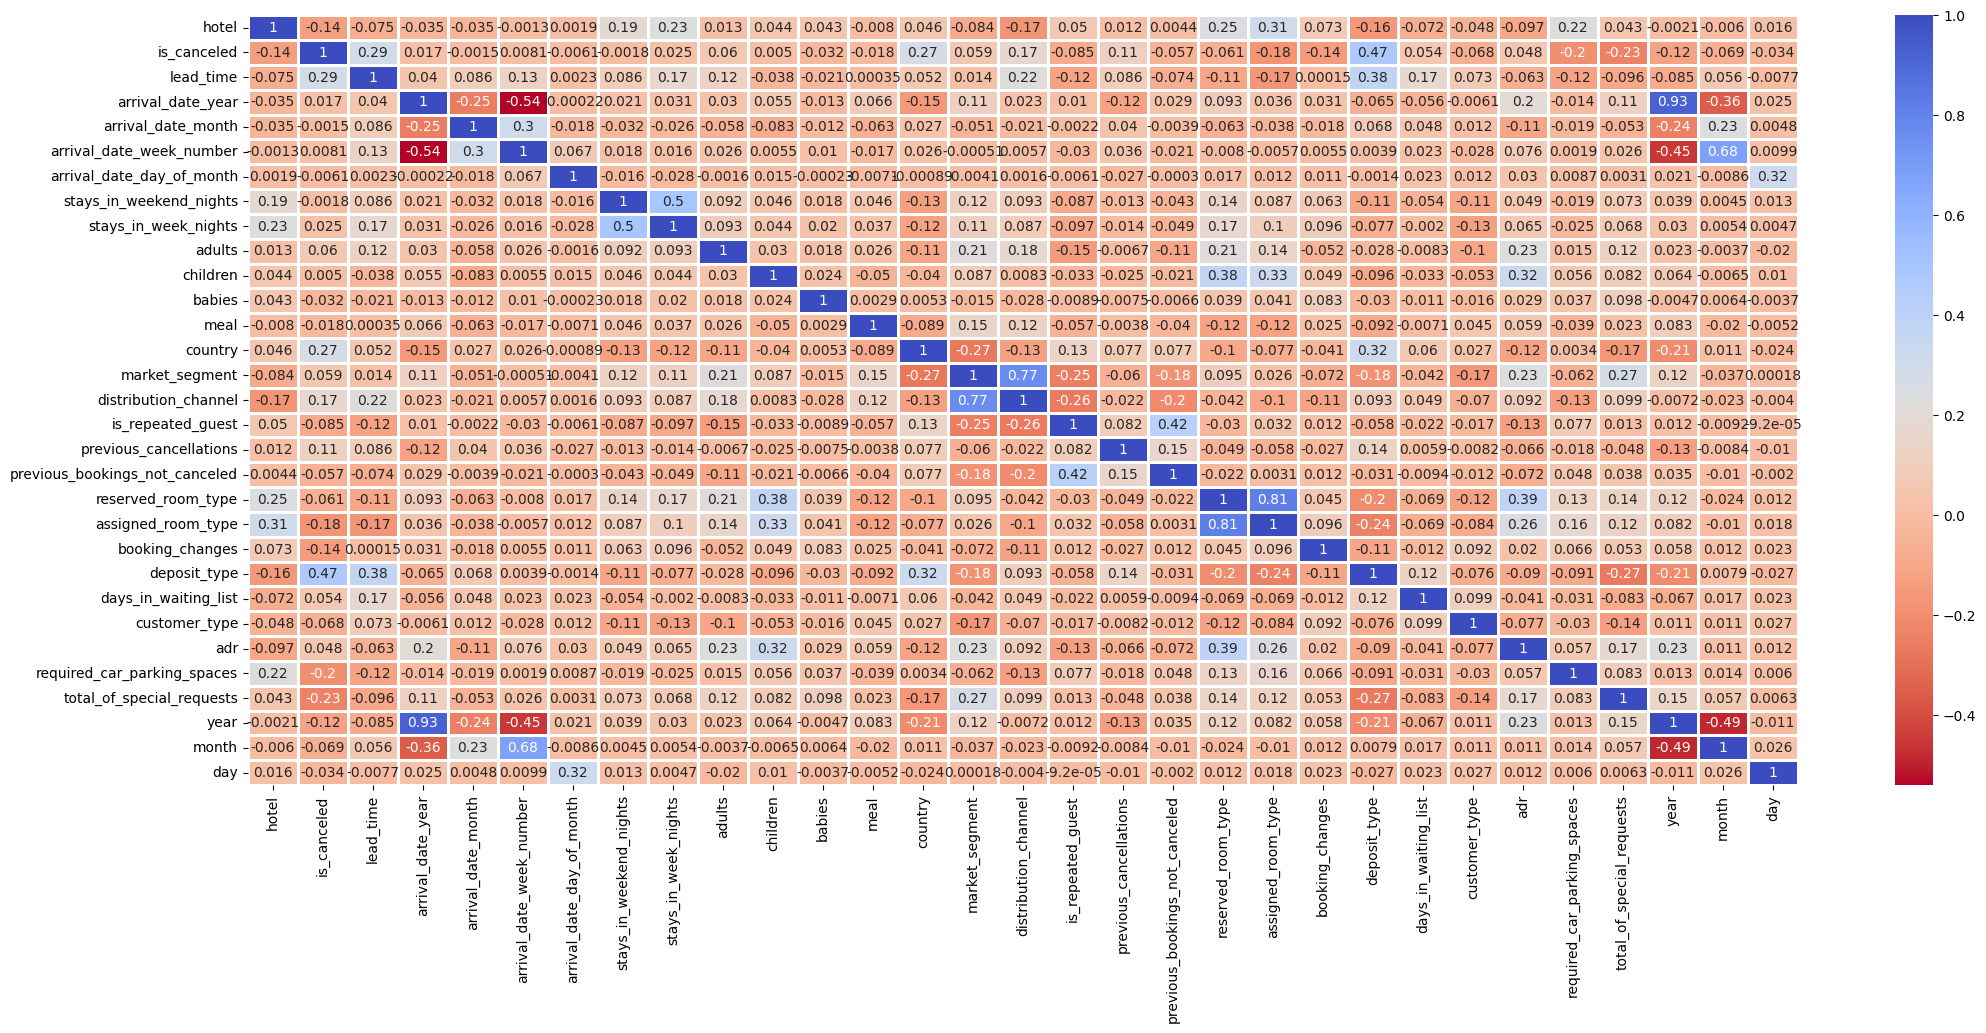

In [46]:
plt.figure(figsize = (25, 10))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1, cmap='coolwarm_r')
plt.show()

In [47]:



corr = df.corr()['is_canceled'].abs().sort_values(ascending = False)

corr


is_canceled                       1.000000
deposit_type                      0.468634
lead_time                         0.293123
country                           0.267502
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
assigned_room_type                0.176028
distribution_channel              0.167600
booking_changes                   0.144381
hotel                             0.136531
year                              0.117036
previous_cancellations            0.110133
is_repeated_guest                 0.084793
month                             0.068605
customer_type                     0.068140
reserved_room_type                0.061282
adults                            0.060017
market_segment                    0.059338
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
day                               0.034131
babies                            0.032491
stays_in_we

In [48]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,year,month,day
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0,2,0.0,0,0,2015-07-01,1,6,0
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0,2,0.0,0,0,2015-07-01,1,6,0
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0,2,75.0,0,0,2015-07-02,1,6,1
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,0,2,75.0,0,0,2015-07-02,1,6,1
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,0,2,98.0,0,1,2015-07-03,1,6,2


In [49]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'year', 'month', 'day'],
      dtype='object')

In [50]:
df['adr']= df['adr'].astype(int)

In [51]:
df= df.drop([ 'reservation_status_date'], axis= 1)

In [52]:
X= df.drop('is_canceled', axis=1)

y=df['is_canceled']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
#scaler= StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test= scaler.transform(X_test)

In [55]:

model = LogisticRegression(max_iter=1000)

model.fit(X, y)

predictions = model.predict(X)

print(predictions)

[0 0 0 ... 0 0 0]


In [56]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.83 0.17]
 [0.57 0.43]
 [0.97 0.03]
 ...
 [0.97 0.03]
 [0.63 0.37]
 [0.73 0.27]]


In [57]:
model.score(X, y)

0.792746461177653

VALIDACIÓN DEL MODELO

In [58]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [59]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [60]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.7908535053187034


In [61]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 79.09 %
Error: 20.91 %


## KNN

In [62]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))


accuracy_score: 0.5608091129910378
f1_score: 0.31756361033383224
precision: 0.3814884302689181
recall: 0.2719875153271653


## Árbol de decisión

In [63]:

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = tree.predict(X_test)

# Calcular y mostrar las métricas de evaluación
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))



Accuracy score: 0.5460256302872938
F1 score: 0.3422330097087379
Precision: 0.37554934079105073
Recall: 0.31434622673057633


## Random Forest

In [68]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy score: 0.585434290979144
F1 score: 0.2209805618950185
Precision: 0.3758029978586724
Recall: 0.15650429160628693
